In [1]:
#import libs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\OMEN\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [9]:
Data=pd.read_csv('Position_Salaries.csv') #read main data source
Data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [69]:
Data.describeberibe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [70]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [63]:
xData= Data.iloc[:, 1:-1].values #define predictor (X data) take second column (level) (!!must 2D array defined)
yData=Data.iloc[:,-1].values #define target (Y data) take single from last column (salary) (!!single array)

In [65]:
xData.shape

(10, 1)

In [89]:
from sklearn.ensemble import RandomForestRegressor
regresi = RandomForestRegressor(n_estimators=20,oob_score=True, random_state=0)
regresi.fit(xData, yData)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=True,
                      random_state=0, verbose=0, warm_start=False)

In [90]:
regresi.predict([[4.1]])

array([93500.])

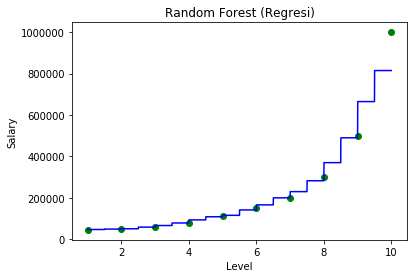

In [91]:
X_grid = np.arange(min(xData), max(xData), 0.001) #create value range from xData /0.001
X_grid = X_grid.reshape((len(X_grid), 1)) #reshape into single column
plt.scatter(xData, yData, color = 'green') #plot scatter of training data
plt.plot(X_grid, regresi.predict(X_grid), color = 'blue') #plot regressor value from X_grid value
plt.title('Random Forest (Regresi)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [92]:
regresi.oob_score_

0.6479618525523783